In [8]:
pip install librosa

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [9]:
import matplotlib.pyplot as plt
%matplotlib inline

In [10]:
import IPython.display as ipd
import librosa
import librosa.display

In [11]:
file = 'dataset/TrainAudioFiles/0.mp3'

/home/jishnu/.local/lib/python3.8/site-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


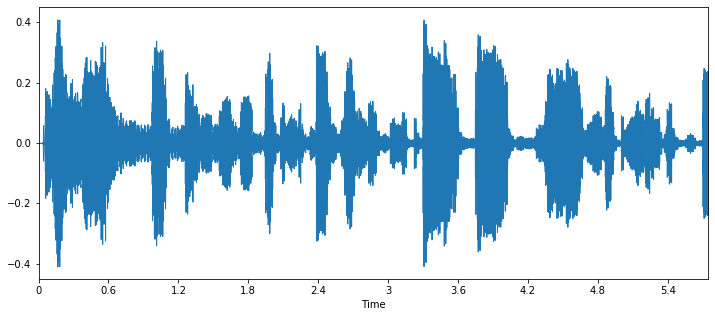

In [5]:
 # ploting the signal from the audio file
plt.figure(figsize=(12,5))
data , sample_rate = librosa.load(file)
librosa.display.waveplot(data,sr = sample_rate)
ipd.Audio(file)

In [14]:
train_file = 'dataset/train.csv'

import pandas as pd

train_dataset = pd.read_csv(train_file)
train_dataset.head()

,filename,emotion
0,18777.mp3,neutral
1,24041.mp3,neutral
2,1621.mp3,joy
3,28883.mp3,neutral
4,14918.mp3,neutral


In [18]:
### check if the dataset is imbalanced
train_dataset['emotion'].value_counts()

neutral     2630
joy          967
surprise     640
anger        596
sadness      344
fear         328
disgust      311
Name: emotion, dtype: int64

In [ ]:
# DATA Preprocessing

